# BAYES Classifier

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

In [25]:

X_train = np.load('./data/titanic/X_train.npy')
y_train = np.load('./data/titanic/y_train.npy')
X_test = np.load('./data/titanic/X_test.npy')
y_test = np.load('./data/titanic/y_test.npy')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1047, 10), (1047,), (262, 10), (262,))

### distributions v/s normal (assumed)

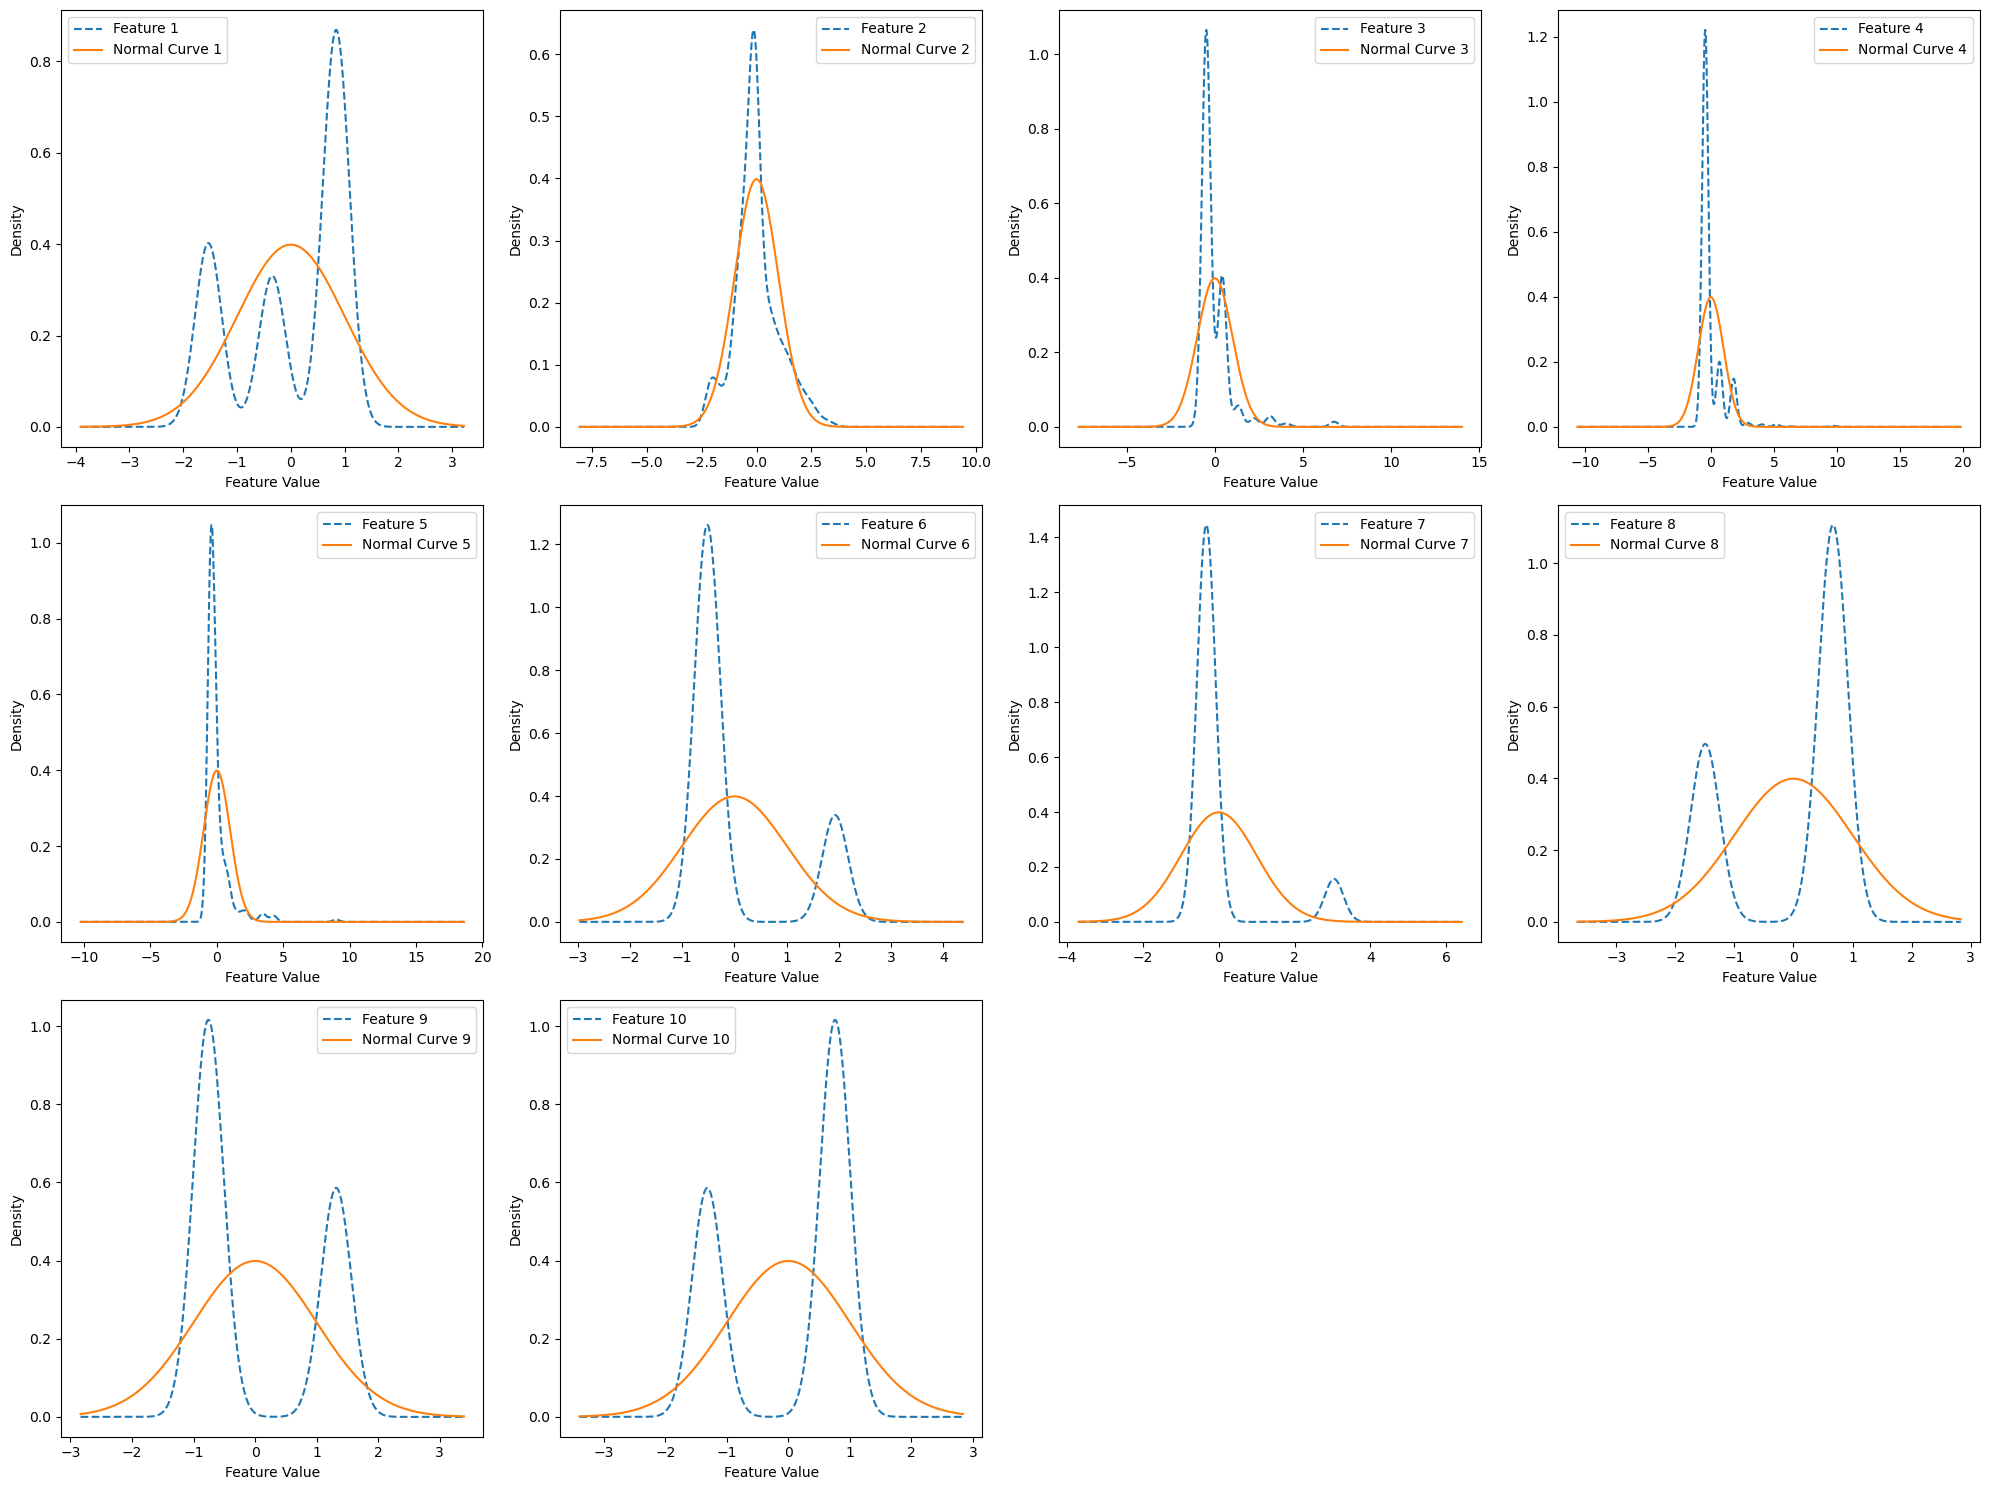

In [32]:
num_features = X_train.shape[1]
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

for k in range(num_features):
    row = k // num_cols
    col = k % num_cols
    ax = axes[row, col]
    kde = gaussian_kde(X_train[:, k])
    rangee =  X_train[:, k].max() - X_train[:, k].min()
    x_range = np.linspace(X_train[:, k].min() - rangee, X_train[:, k].max() + rangee, 1000)
    mean = np.mean(X_train[:, k])
    std = np.std(X_train[:, k])
    normal_curve = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_range - mean) / std) ** 2)
    _ = ax.plot(x_range, kde(x_range), linestyle='dashed', label=f'Feature {k+1}')
    _ = ax.plot(x_range, normal_curve, label=f'Normal Curve {k+1}')
    _ = ax.set_xlabel('Feature Value')
    _ = ax.set_ylabel('Density')
    _ = ax.legend()

# Remove empty subplots
for k in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[k])
plt.tight_layout()
plt.show()

## implementation

## all together

In [65]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.var = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.priors = np.zeros(len(self.classes), dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(X.shape[0])

    def _calculate_likelihood(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _calculate_posterior(self, x):
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            likelihood = np.sum(np.log(self._calculate_likelihood(idx, x)))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        y_pred = [self._calculate_posterior(x) for x in X]
        return np.array(y_pred)


In [66]:

# Create and train the model
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)


In [67]:
# Evaluate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7786259541984732
